# Deep Learning Competition 3 - Report

Team 24: 109021115 吳嘉濬 113062594 陳力瑋 113024507 林俊甫 113062541 謝承彧

##  5 set of images generated from description with 5 different noise z, respectively

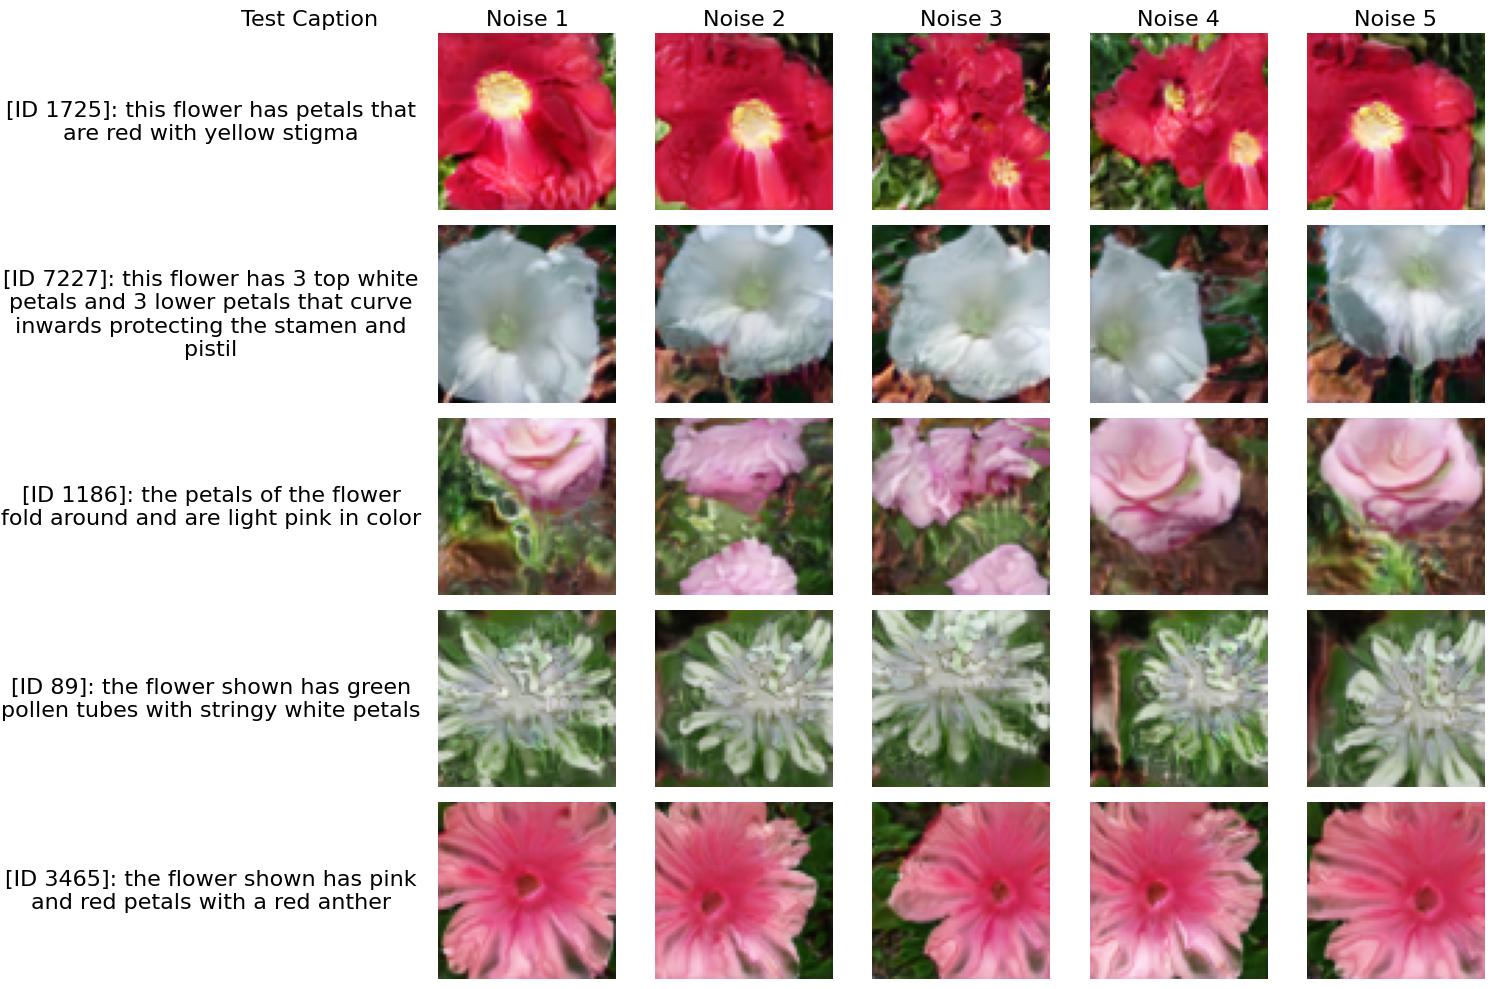

## Models we tried & experiments we did during competition

### RAT-GAN with sentence transformer 'all-MiniLM-L6-v2' 

* Text encoder
    * We used the pretrained sentence transformer 'all-MiniLM-L6-v2' as the text encoder.
    * This is a compact and efficient transformer-based model with only 6 layers and 22 million parameters.
    * The output shape is (batch size, 384)
* GAN
    * We use the RAT-GAN, but slightly modify the input size of the lstm in the RAT-GAN since the sentence embedding becomes 384-dim vector. Follow the setting in our best model, we removed 2 layers in generator and discriminator.
* Loss function
    * The loss function is L1, L2 and BCE loss, which was used in [this repo](https://github.com/yashashwita20/text-to-image-using-GAN/tree/main).
    * The loss function has been slightly modified to introduce a degree of uncertainty in the target values for real and fake labels. Instead of assigning exact values of 0 or 1, the real labels are sampled from a uniform range between 0.97 and 1.0, ensuring they are close to but not exactly 1. Similarly, fake and wrong labels are sampled from a range between 0 and 0.03, keeping them near but not exactly 0.
* Optimizer
    * The generator is optimized using the Adam optimizer with a learning rate of 1e-5, beta_1 of 0.5, and beta_2 of 0.9. Similarly, the discriminator uses the Adam optimizer with a slightly higher learning rate of 2e-5, while beta_1 and beta_2 remain the same.
    * We follow the recommendation from (https://arxiv.org/pdf/1706.08500) to use a higher learning rate for the discriminator.  
* Experiments
    * After training for 300 epochs, the score is 0.738564
    * After training for 600 epochs, the score is 0.726153

### RAT-GAN with Char-CNN-RNN text encoder

* Text encoder
    * For the text-encoder, we tried to use the Char-CNN-RNN, which was recommended by TAs in this competition.
    * Since we cannot use the text-encoder pretrained on the oxford 102 flowers dataset, we attempt to pretrain the text encoder by myself
    * For the data augmentation, we follow the paper [Learning Deep Representations of Fine-grained Visual Descriptions](https://arxiv.org/abs/1605.05395), generate 10 small images from original image (by cropping and horizontal flipping), and use EfficientNetB1 (pretrained on Imagenet) as the feature extractor.
    * For the CharCNNRNN model, we refer to [this repo](https://github.com/martinduartemore/char_cnn_rnn_pytorch) and translate it to tensorflow.
    * In the original paper, it proposed to group those images with the same class together in the same batch. Since we are not allowed to use the label in this competition, we used the KNN to separate these images into 102 groups to achieve the same effect. 
    * It turns out the overfitting always occurs when pretraining the CharCNNRNN model. After 9 epochs, the model starts to overfit on the training dataset. So we only trained it for 9 epochs.
* GAN
    * We use the RAT-GAN, but slightly modify the input size of the lstm in the RAT-GAN since the sentence embedding becomes 1280-dim vector. Follow the setting in our best model, we removed 2 layers in generator and discriminator.
* Loss function
    * The loss function is L1, L2 and BCE loss, which was used in [this repo](https://github.com/yashashwita20/text-to-image-using-GAN/tree/main).
* Experiments
    * After training for 100 epochs, the score is 0.474767, which is close to the score of TA80.
    * We also tried to train it for more epochs, but it turns out the result becomes worser.

### RAT-GAN with SigLIP text encoder

* Text encoder
    * For the text-encoder, we used **SigLIP** this time, which was inspired by [this Hugging Face website](https://huggingface.co/google/siglip-so400m-patch14-384).
    * Pretrained weights available on Hugging Face: **siglip-so400m-patch14-384**
    * **Output dimension: 1152**
* GAN
    * It was proposed in [Recurrent Affine Transformation for Text-to-image Synthesis](https://arxiv.org/abs/2204.10482) (2022)
    * We use the RAT-GAN, but slightly modify the input size of the lstm in the RAT-GAN since the sentence embedding becomes 1152-dim vector. Follow the setting in our best model, we removed 2 layers in generator and discriminator.
    * Modify **R**: Map 1152-dim sentence embedding to 512-dim before Affine block. (Original: 256-dim)
* Loss function
    * The loss function is L1, L2 and BCE loss, which was used in [this repo](https://github.com/yashashwita20/text-to-image-using-GAN/tree/main).
* Experiments
    * Most of configurations follows settings in the original paper
    * Frozen text-encoder
    * GPU: A5000 x 4
    * Batch size = 6 per GPU x 4
    * 600 epochs
    * **Private score: 0.42746, Public score: 0.42272**